In [26]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

## Load in Results

In [27]:
results_file = 'fit_results.json'
try:
    with open(results_file, 'r') as f:
        results = json.load(f)
except:
    results = {} # dictionary to record the test results
    
# results['TESS'] = {
#     'times_lc':dataset.times_lc['TESS'].tolist(), 
#     'data_lc':dataset.data_lc['TESS'].tolist(), 
#     'errors_lc':dataset.errors_lc['TESS'].tolist(), 
#     'transit_model':transit_model.tolist(), 'phases':phases.tolist(), 'idx':idx.tolist()
#     }

## Plot Figure

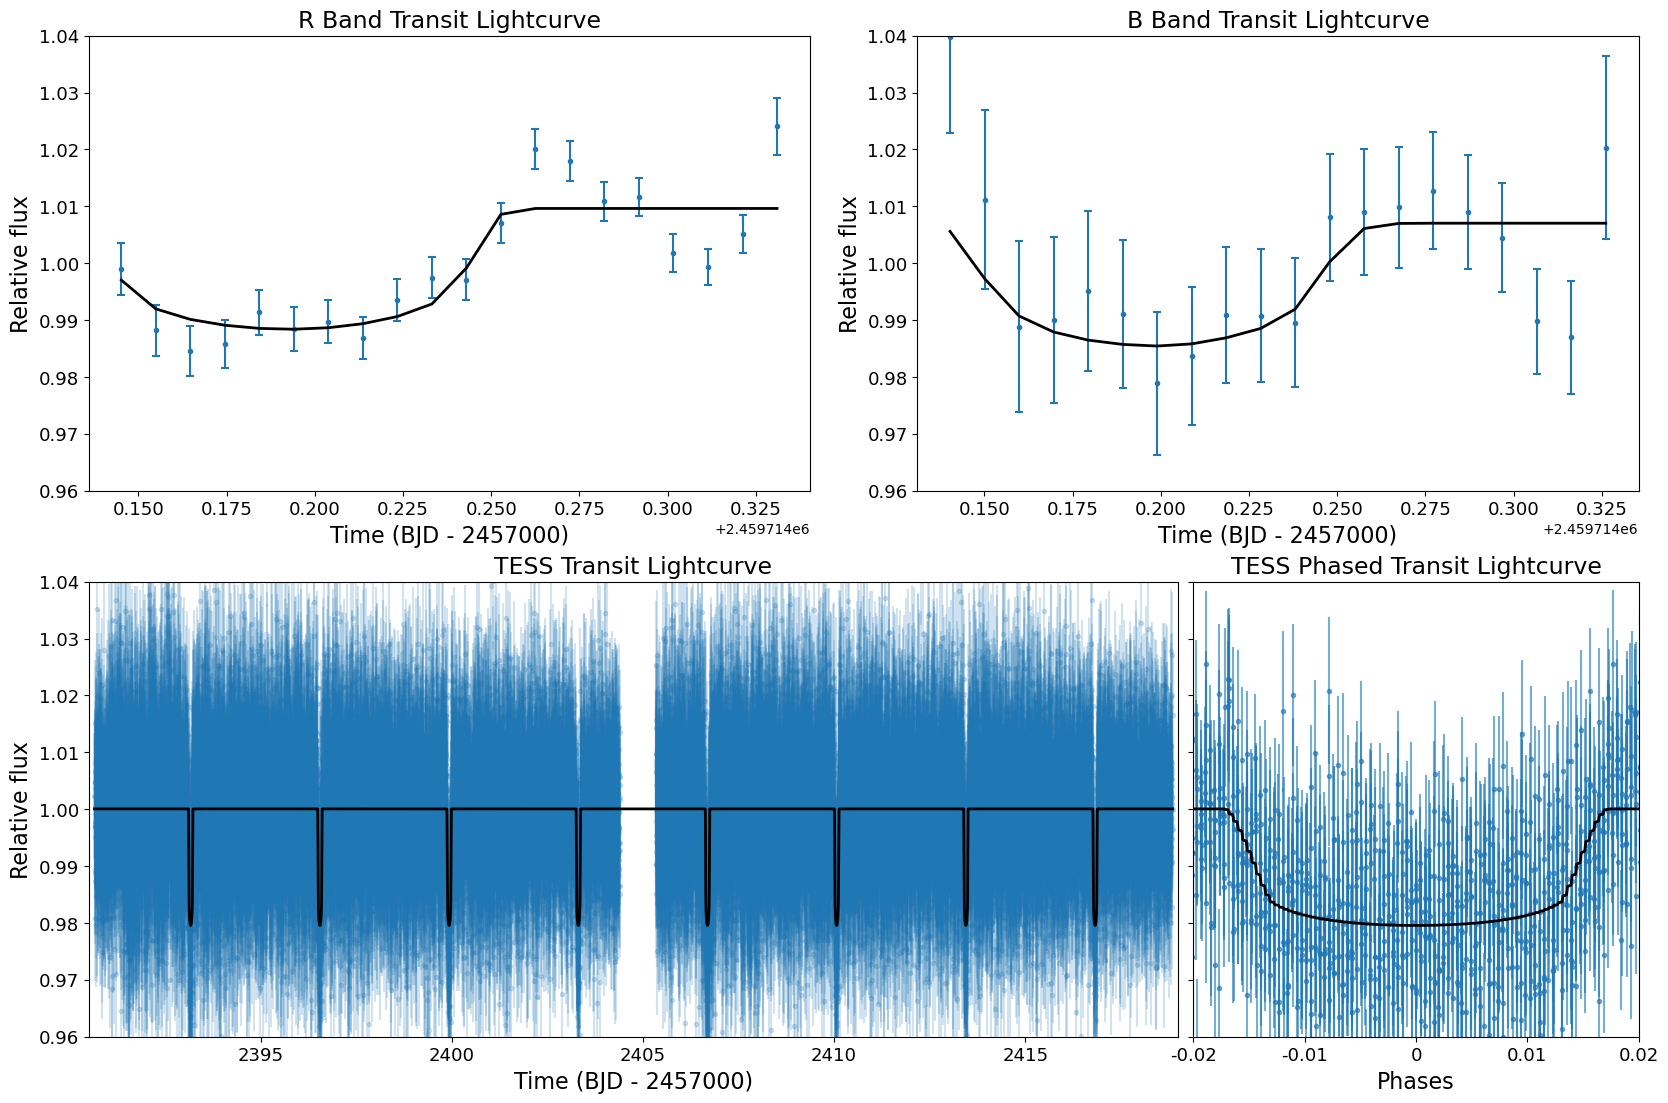

In [74]:
plt.figure(figsize=(20,13))
gs = gridspec.GridSpec(2, 17)

# R-band
ax1 = plt.subplot(gs[0,0:8])
ax1.errorbar(results['R-band']['times_lc'], results['R-band']['data_lc'],
             yerr = results['R-band']['errors_lc'], 
             fmt = '.', alpha = 1, linewidth=1.5, capsize=3, capthick=1.5)
ax1.plot(results['R-band']['times_lc'], results['R-band']['transit_model'],
         color='black', zorder=10, linewidth=2)
ax1.set_ylim([0.96,1.04])
ax1.set_xlabel('Time (BJD - 2457000)', fontsize=16)
ax1.set_ylabel('Relative flux', fontsize=16)
ax1.set_title('R Band Transit Lightcurve', fontsize=17)
ax1.tick_params(labelsize=13)


# B-band
ax2 = plt.subplot(gs[0,9:17])
ax2.errorbar(results['B-band']['times_lc'], results['B-band']['data_lc'],
             yerr = results['B-band']['errors_lc'],
             fmt = '.', alpha = 1, linewidth=1.5, capsize=3, capthick=1.5)
ax2.plot(results['B-band']['times_lc'], results['B-band']['transit_model'],
         color='black', zorder=10, linewidth=2)
ax2.set_ylim([0.96,1.04])
ax2.set_xlabel('Time (BJD - 2457000)', fontsize=16)
ax2.set_ylabel('Relative flux', fontsize=16)
ax2.set_title('B Band Transit Lightcurve', fontsize=17)
ax2.tick_params(labelsize=13)


# TESS transit lightcurve:
ax3 = plt.subplot(gs[1,0:12])
# plot time v/s flux plot:
ax3.errorbar(results['TESS']['times_lc'], results['TESS']['data_lc'], 
             results['TESS']['errors_lc'], fmt = '.', alpha = 0.2)
# plot the model
ax3.plot(results['TESS']['times_lc'], results['TESS']['transit_model'], 
         color='black', zorder=10, linewidth=2)
ax3.set_xlim([2390.5, 2419])
ax3.set_ylim([0.96,1.04])
ax3.set_xlabel('Time (BJD - 2457000)', fontsize=16)
ax3.set_ylabel('Relative flux', fontsize=16)
ax3.set_title('TESS Transit Lightcurve', fontsize=17)
ax3.tick_params(labelsize=13)


# TESS phased transit lightcurve
ax4 = plt.subplot(gs[1,12:17])
ax4.errorbar(results['TESS']['phases'], results['TESS']['data_lc'],
             yerr = results['TESS']['errors_lc'],
             fmt = '.', alpha = 0.6)
idx = np.argsort(results['TESS']['phases'])
ax4.plot(np.array(results['TESS']['phases'])[np.array(results['TESS']['idx'])],
         np.array(results['TESS']['transit_model'])[np.array(results['TESS']['idx'])],
         color='black', zorder=10, linewidth=2)
ax4.yaxis.set_major_formatter(plt.NullFormatter())
ax4.set_xlim([-0.02,0.02])
ax4.set_ylim([0.96,1.04])
ax4.set_xlabel('Phases', fontsize=16)
ax4.set_title('TESS Phased Transit Lightcurve', fontsize=17)
ax4.set_xticks([-0.02,-0.01,0,0.01,0.02])
ax4.set_xticklabels(['-0.02','-0.01','0','0.01','0.02'])
ax4.tick_params(labelsize=13)

plt.savefig(os.path.join('figures', 'figure.jpg'))